# Import Libary

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Stroke Prediction') # Membaca File Dataset
df # Menampilkan Dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,Stroke
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,No Stroke
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,No Stroke
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,No Stroke
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,No Stroke


# Pembersihan Data kosong

In [ ]:
datakosong = df.isnull().sum()
datakosong[datakosong > 0]  # Menampilkan data kosong

,0
bmi,201


In [ ]:
df = df.dropna() # Menghapus Data Kosong

# Visualisasi Data

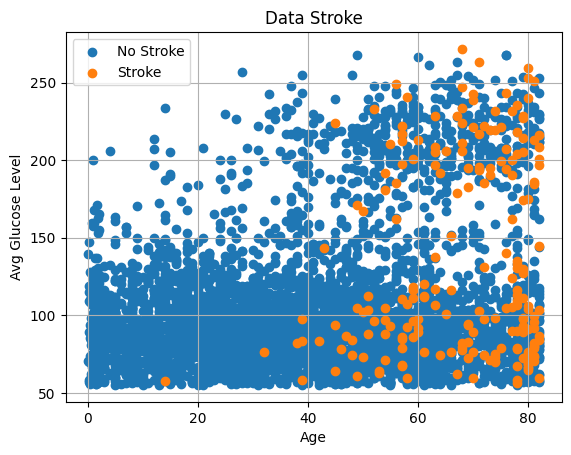

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for stroke, d in df.groupby('stroke'):
  ax.scatter(d['age'], d['avg_glucose_level'], label=stroke)

plt.legend(loc='upper left')
plt.title('Data Stroke')
plt.xlabel('Age')
plt.ylabel('Avg Glucose Level')
plt.grid(True)
plt.show()

# Preprocessing Dataset

In [ ]:
import numpy as np

# Use double square brackets to select multiple columns
x_train = np.array(df[['age', 'avg_glucose_level']])
y_train = np.array(df['stroke'])

print(f'x_train: {x_train}')
print(f'y_train: {y_train}')

x_train: [[ 67.   228.69]
 [ 80.   105.92]
 [ 49.   171.23]
 ...
 [ 35.    82.99]
 [ 51.   166.29]
 [ 44.    85.28]]
y_train: ['Stroke' 'Stroke' 'Stroke' ... 'No Stroke' 'No Stroke' 'No Stroke']


In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n {y_train}')

y_train:
 [[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [ ]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [1 1 1 ... 0 0 0]


# Training KNN Clasification Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 2
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
age = 90
avg = 190

x_new = np.array([[age, avg]]).reshape(1,-1)
x_new

array([[ 90, 190]])

In [ ]:
y_new = model.predict(x_new)
y_new

array([1])

In [ ]:
lb.inverse_transform(y_new)

array(['Stroke'], dtype='<U9')

# Visualisasi Nearest Neighbours

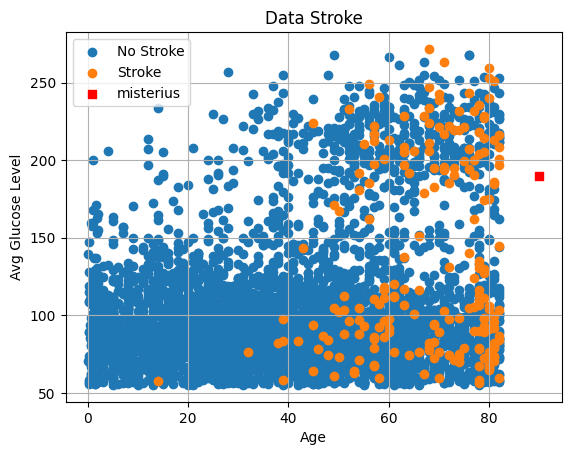

In [ ]:
fig, ax = plt.subplots()
for stroke, d in df.groupby('stroke'):
  ax.scatter(d['age'], d['avg_glucose_level'], label=stroke)

plt.scatter(age,
            avg,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Data Stroke')
plt.xlabel('Age')
plt.ylabel('Avg Glucose Level')
plt.grid(True)
plt.show()

# Kalkulasi Distance

In [ ]:
misterius = np.array([age, avg])
misterius

array([ 90, 190])

In [ ]:
x_train

array([[ 67.  , 228.69],
       [ 80.  , 105.92],
       [ 49.  , 171.23],
       ...,
       [ 35.  ,  82.99],
       [ 51.  , 166.29],
       [ 44.  ,  85.28]])

In [ ]:
from scipy.spatial.distance import euclidean

distance = [euclidean(misterius, x) for x in x_train]
distance

[45.010177737929446,
 84.67258352028713,
 45.09227095634018,
 19.317722433040597,
 9.765454418510178,
 120.97275767709026,
 97.8890805963566,
 131.976683167899,
 109.93900536206428,
 75.34461891867262,
 92.7606603038163,
 26.482599947890314,
 45.938089860158534,
 26.049800383112345,
 34.69962679914583,
 105.15040846330555,
 19.40421603672769,
 57.6022924891015,
 40.232946697948925,
 19.972230721679548,
 89.17755827561102,
 86.46024751294667,
 92.46383292942166,
 21.641462519894535,
 39.70549584125604,
 116.89922198201322,
 10.577636787108915,
 63.512190955752736,
 113.83163005070251,
 106.27154322771455,
 33.75319836696961,
 116.765735128076,
 102.50299702935519,
 135.4445572919045,
 112.6111934933646,
 124.11562512431705,
 45.804039123203964,
 37.820376782893106,
 55.378844336082,
 88.71249968296463,
 91.11557989718334,
 141.425768868336,
 63.66744929710942,
 67.1405756603263,
 27.82128861142129,
 130.92464397507447,
 17.717226080851372,
 37.12499023568895,
 34.34135844721347,
 115.53

In [ ]:
df['jarak'] = distance
df.sort_values(['jarak'])

<ipython-input-63-f5c718dc45d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['jarak'] = distance


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,jarak
5,56669,Male,81.00,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,Stroke,9.765454
32,39373,Female,82.00,1,0,Yes,Self-employed,Urban,196.92,22.2,never smoked,Stroke,10.577637
226,32729,Female,81.00,0,0,Yes,Private,Rural,184.40,27.5,never smoked,Stroke,10.600000
3772,61827,Male,80.00,0,0,Yes,Self-employed,Rural,196.08,31.0,formerly smoked,No Stroke,11.703265
2336,9026,Female,78.00,1,0,Yes,Self-employed,Urban,191.33,24.5,never smoked,No Stroke,12.073479
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293,69222,Male,0.24,0,0,No,children,Urban,57.09,19.4,Unknown,No Stroke,160.380565
3097,13629,Male,1.32,0,0,No,children,Urban,56.11,22.9,Unknown,No Stroke,160.594752
3313,53843,Female,1.48,0,0,No,children,Rural,55.59,17.9,Unknown,No Stroke,160.940481
1632,57485,Female,1.48,0,0,No,children,Rural,55.51,18.5,Unknown,No Stroke,161.007300


# Evaluasi Knn Clasification Model

In [ ]:
# Testing Set
x_test = np.array([[90,190], [75,78],[90,195], [80,100]])
y_test = lb.transform(np.array(['Stroke', 'No Stroke', 'Stroke', 'Stroke'])).flatten()

print(f'x_test: {x_test}')
print(f'y_test: {y_test}')

x_test: [[ 90 190]
 [ 75  78]
 [ 90 195]
 [ 80 100]]
y_test: [1 0 1 1]


In [ ]:
# Prediksi Set
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 0])

# Acuracy

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f'Akurasi: {acc}')

Akurasi: 0.75


# Precession

In [ ]:
from sklearn.metrics import precision_score

pre = precision_score(y_test, y_pred)
print(f'Precession: {pre}')

Precession: 1.0


# Recall

In [ ]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)
print(f'Recall: {rec}')

Recall: 0.6666666666666666


# F1 Score

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')


F1 Score: 0.8


# Classification Report

In [ ]:
from sklearn.metrics import classification_report
cl = classification_report(y_test, y_pred)
print(f'Classification Report:\n {cl}')

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



# Matthews Correlatiin Coeffecient (MCC)

In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc}')

MCC: 0.5773502691896258
